## Python Challenge - Consumer Analytics 

- From: https://www.kaggle.com/blastchar/telco-customer-churn
- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
- The raw data contains 7043 rows (customers) and 21 columns (features).
- The “Churn” column is our target.

In [292]:
# Start by importing all the packages we might need
# Import Pandas and Matplotlib
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np 
import seaborn as sns





In [293]:
#Read the data into a variable
telco = pd.read_csv("telco.csv", index_col= 'customerID', parse_dates=True)


In [294]:
#Let's see how much data we're working with, print the dimensions of the dataset
telco.shape


(7043, 20)

In [295]:
telco.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [296]:
telco.columns.values 

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [297]:
telco.dtypes
#super helpful for identifying data types as when doing the challange i assumed churn was a boolean obvisouly yes being true and no being false

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [298]:
telco.TotalCharges = pd.to_numeric(telco.TotalCharges, errors='coerce')
telco.isnull().sum() 
#11 cells in total charges are empty use drop func to rid them 

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [303]:
telco.dropna(inplace= True) #dropped empty cells 
telco_new = telco.iloc[:,1:] #removing corresponding customer ids with cells 

In [349]:
# Investigate the gender distribution of our data(# Men vs. Women)
telco["gender"].value_counts() 



Male      3549
Female    3483
Name: gender, dtype: int64

array([<AxesSubplot:ylabel='gender'>], dtype=object)

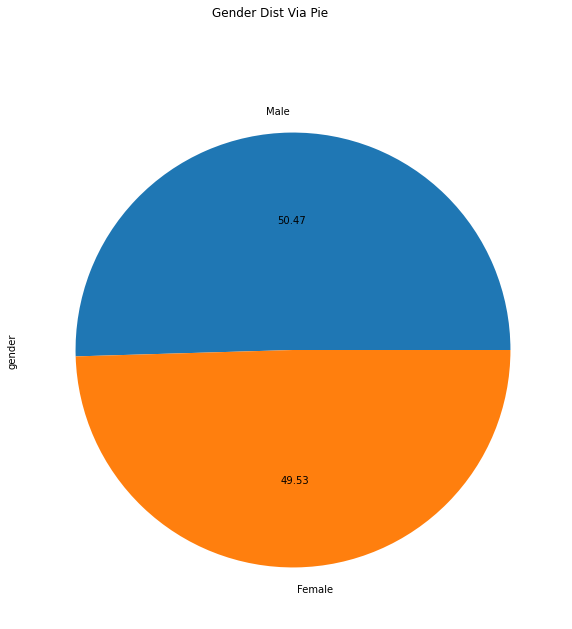

In [362]:
gen_dist = telco["gender"].value_counts() 
gen_dist.head()

gen_dist.plot(kind= 'pie', subplots=True, figsize=(25, 10),  autopct='%.2f',  title= 'Gender Dist Via Pie')

array([<AxesSubplot:ylabel='Dependents'>], dtype=object)

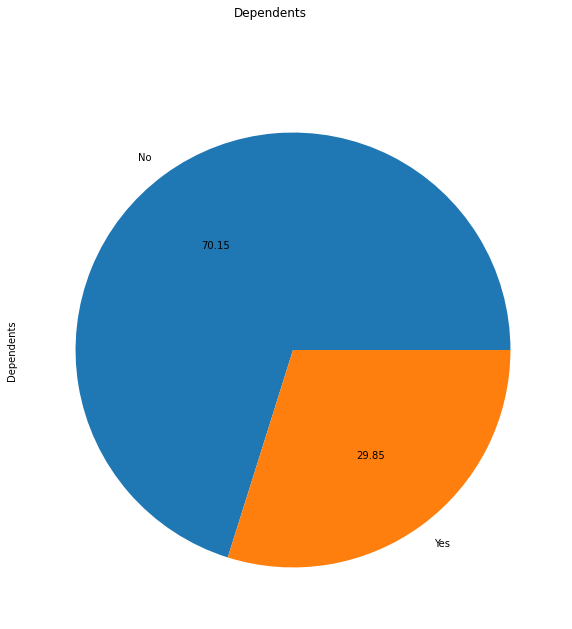

In [363]:
Depend = telco["Dependents"].value_counts() 
Depend.head()

Depend.plot(kind= 'pie', subplots=True, figsize=(25, 10),  autopct='%.2f',  title= 'Dependents')

array([<AxesSubplot:ylabel='SeniorCitizen'>], dtype=object)

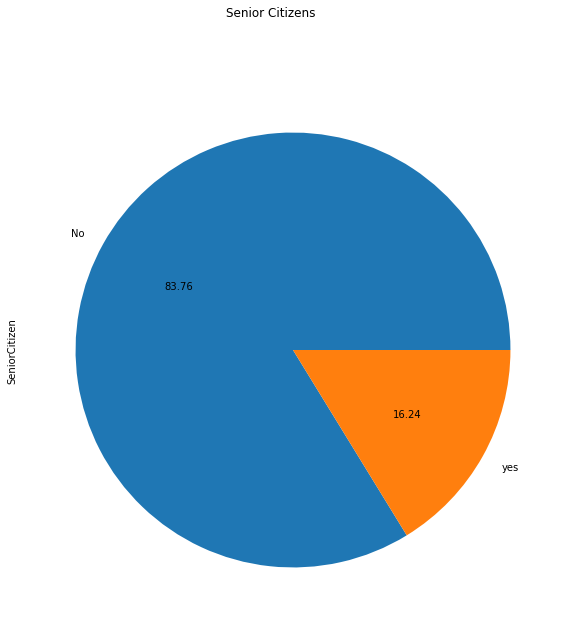

In [425]:
SeniorCit = telco["SeniorCitizen"].value_counts() 
SeniorCit.head()

SeniorCit.plot(kind= 'pie', subplots=True, figsize=(25, 10),  autopct='%.2f',  title= 'Senior Citizens')

array([<AxesSubplot:ylabel='Partner'>], dtype=object)

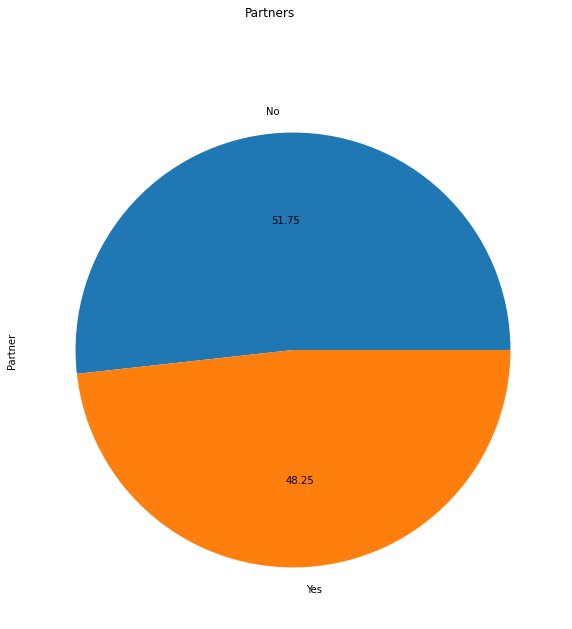

In [361]:
partners = telco["Partner"].value_counts() 
partners.head()

partners.plot(kind= 'pie', subplots=True, figsize=(25, 10),  autopct='%.2f',  title= 'Partners')

In [153]:
gen_dist.agg(['min', 'max', 'sum','median'])

min       3488.0
max       3555.0
sum       7043.0
median    3521.5
Name: gender, dtype: float64

In [154]:
gen_dist.head()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:title={'center':'Gender Dist via Bar Chart'}>

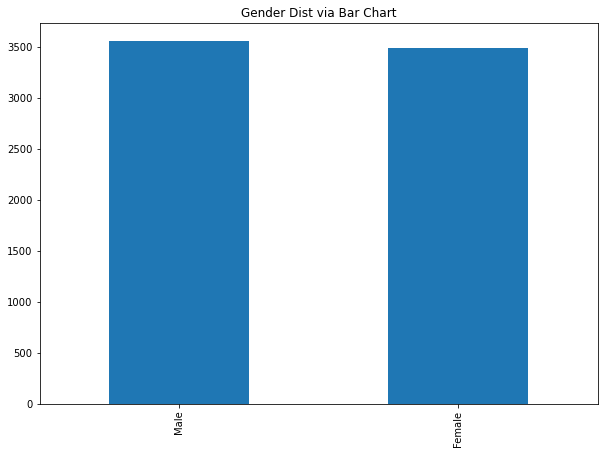

In [155]:
gen_dist.plot(kind= 'bar', figsize=(10, 7),  title= 'Gender Dist via Bar Chart',)

<AxesSubplot:title={'center':'Payment Dist via Bar Chart'}, ylabel='PaymentMethod'>

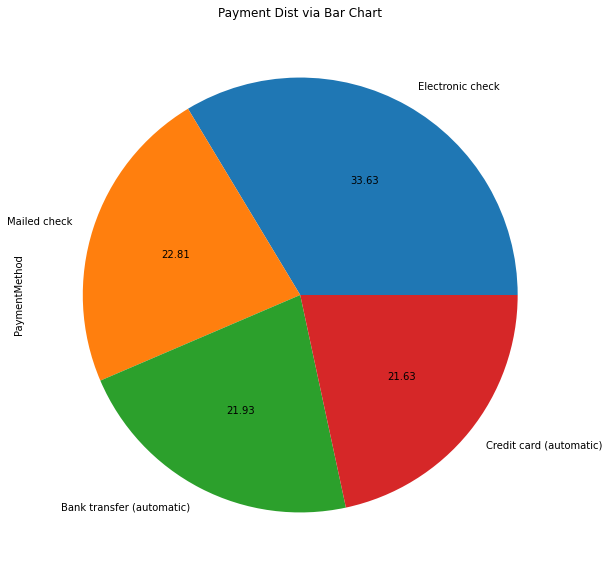

In [364]:
# Let's do the same for the Payment Methods. 
# Calculate and plot the different Payment Methods.
telco["PaymentMethod"].value_counts()

payment_dist = telco["PaymentMethod"].value_counts()

payment_dist.plot(kind= 'pie', figsize=(20,10),  title= 'Payment Dist via Bar Chart', autopct='%.2f')



<AxesSubplot:title={'center':'Payment Dist via line Chart'}>

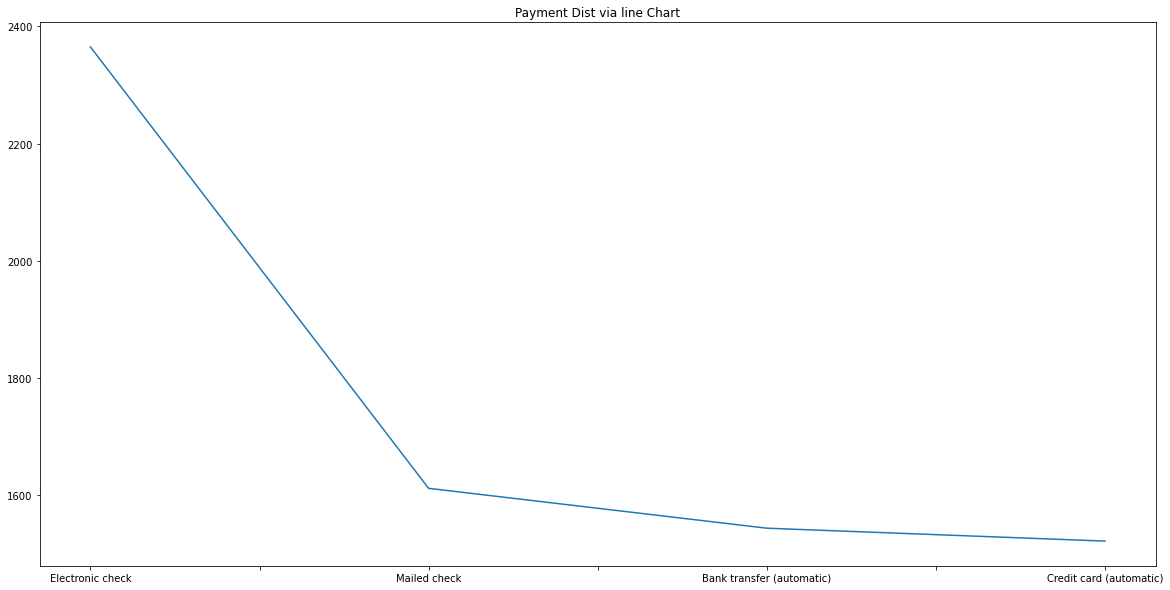

In [157]:
payment_dist.plot(kind= 'line', figsize=(20,10),  title= 'Payment Dist via line Chart',)

In [158]:
payment_dist = telco["PaymentMethod"].value_counts()
payment_dist.head()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

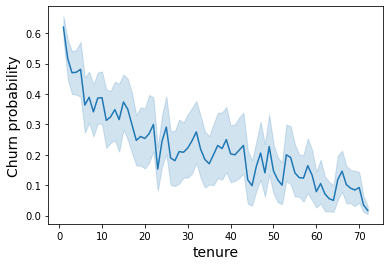

In [421]:


ChurnProb = sns.lineplot(x="tenure", y="Churn", data=telco, palette="muted")
ChurnProb.set_xlabel("tenure", fontsize=14)
ChurnProb.set_ylabel("Churn probability", fontsize=14)

plt.savefig('telcoChurnProbability.png')


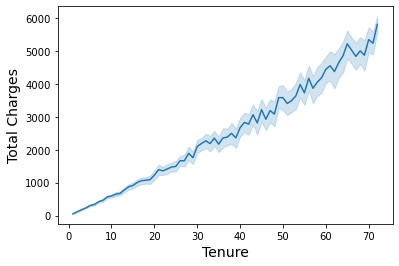

In [422]:
Charge_nd = sns.lineplot(x="tenure", y="TotalCharges", data=telco, palette="muted")
Charge_nd.set_xlabel("Tenure", fontsize=14)
Charge_nd.set_ylabel("Total Charges", fontsize=14)

plt.savefig('telcoChargesTenure.png')

In [308]:
telco.dtypes
#super helpful for identifying data types as when doing the challange i assumed churn was an boolean

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [309]:
#In the "Churn" column, replace "Yes" values with 1 and "No" values with 0

telco['Churn'].replace(to_replace='Yes', value=1, inplace=True)

telco['Churn'].replace(to_replace='No',  value=0, inplace=True)
    
    

In [310]:
telco.head()
# Reprinted to see changed churn values 



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [376]:
telco['SeniorCitizen'].replace(to_replace= 0, value='No', inplace=True)

telco['SeniorCitizen'].replace(to_replace=1,  value='yes', inplace=True)
#for pie chart above so 1 and 0 are expressed as yes a senior citizen or not one 

In [379]:
telco.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


In [388]:
# Create a Pivot Table measuring the amount of customer churn by gender and Payment Method

telco_pivot = telco.pivot_table(values='Churn', index= 'gender', columns = 'PaymentMethod', aggfunc= 'count')


In [390]:
telco_pivot.head()

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
gender,,,,
Female,787,751,1170,775
Male,755,770,1195,829


In [396]:
telco_SeniorPiv = telco.pivot_table(values='Churn', index= 'SeniorCitizen', columns = 'PaymentMethod', aggfunc= 'count')

In [397]:

telco_SeniorPiv.head(10)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
SeniorCitizen,,,,
No,1309,1300,1771,1510
yes,233,221,594,94


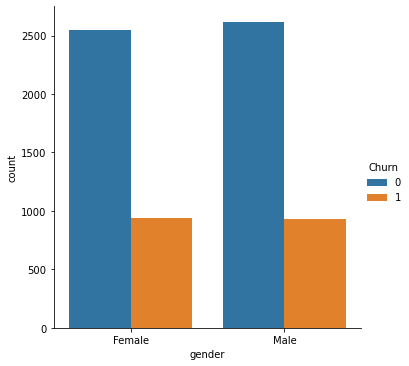

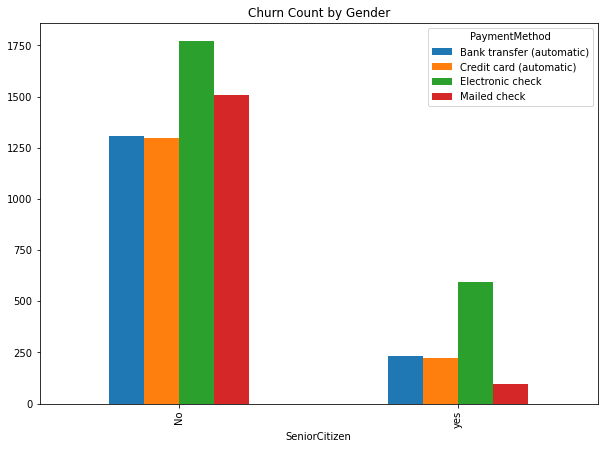

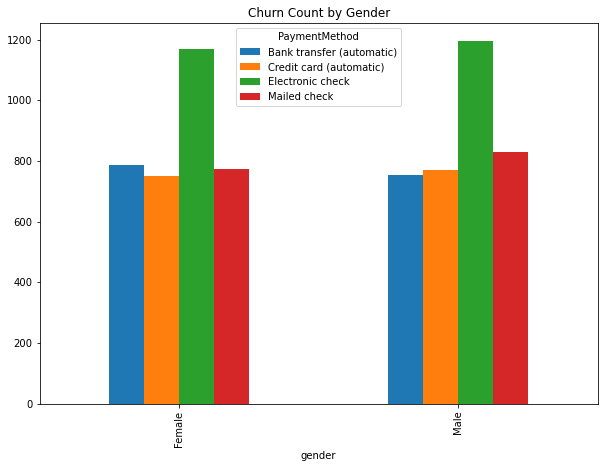

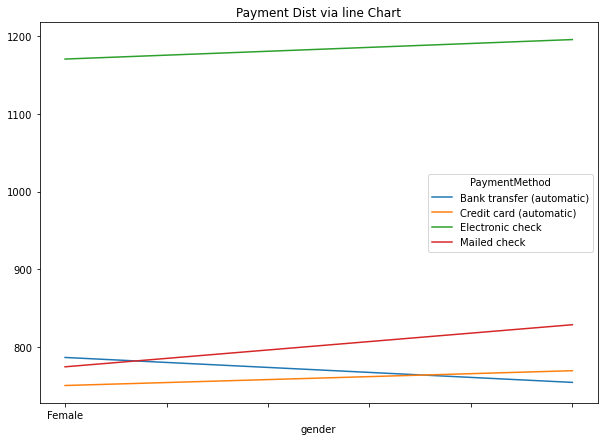

In [426]:
#Visualize your pivot table, make sure to add a title, and to size your graph appropriately

CountPlt = sns.catplot(x="gender", kind="count",hue="Churn", data= telco,)
#yes = 1 
#No = 0 Changed before due to instructions 

plt.savefig('telcoBarCount.png')

telco_SeniorPiv.plot(kind= 'bar', figsize=(10, 7),  title= 'Churn Count by Gender')

plt.savefig('telcoBarCountSenior.png')

telco_pivot.plot(kind= 'bar', figsize=(10, 7),  title= 'Churn Count by Gender')

plt.savefig('telcoBar.png')

telco_pivot.plot(kind= 'line', figsize=(10,7),  title= 'Payment Dist via line Chart',)

plt.savefig('telcoLine.png')

#Export your graph to JPG/PNG



In [412]:
#Q: In 1-2 senteces, explain your findings from your graphs.


#A: - Males have a higher Churn count in all payment Methods Except for Banktransfer where women have a higher Churn count 
# - However there is a room for error here as the datafram has a slightly higher count of males then females with males making up 50.5%
# And females making up for 49.5% of the data 
# - Electronic Check takes up the biggest percent of the paymentmethod used by the dataset at 33% 
# - We also can see that 16% of the telco datafame is made of Senior Citizens 
# - We can also see from the churn via tenure line chart that the data displays a negative corralation meaning as tenure decreases churn increases
# - We can aslo see a posative corralation with tenure and total charges meaning the longer a customer is subscribed the more they use and rack up charges 

